# Questions:
- Do I need to remove "outliers" in logistic regression? like in cell #13, 14
- What do they mean with the parameters for logistic regression "l1"/ "l2"
- what are the "strengths and limitations of regression as a modeling approach" (from the model)

# Challenge lesson 3
In this project, I chose a dataset with a binary prediction; if an adult makes less or more than 50k a year. 

After cleaning the data I'll use 
- Vanilla logistic regression
- Ridge logistic regression
- Lasso logistic regression

Compare their results and see which one performs better

data is from https://www.kaggle.com/johnolafenwa/us-census-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix

# Loading the data and doing basic cleaning

In [2]:
# the data was split to train and test
# I'll combine it, clean work, and then split it again

# load the dataframes 
train_data = pd.read_csv('adult-training.csv')
test_data = pd.read_csv('adult-test.csv', names=train_data.columns, header=None)

# concatenate the data frames
df = pd.concat([train_data, test_data], axis=0)
df = df.reset_index(drop=True)

# show
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


In [3]:
df.tail()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
48837,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
48838,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
48839,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
48840,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
48841,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


In [4]:
# giving more meaningful names to the columns
col = ['Age','Workclass','fnlgwt','Education','Education_Num','Marital_Status','Occupation',
           'Relationship','Race','Sex','Capital_Gain','Capital_Loss','Hours/Week','Native_Country','Income_Bracket']
df.columns = col

In [5]:
# how many `?` are in the data
(df==' ?').sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Age                  0
Workclass         2799
fnlgwt               0
Education            0
Education_Num        0
Marital_Status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours/Week           0
Native_Country     857
Income_Bracket       0
dtype: int64

In [6]:
# replace '?' with NaN
df = df.replace(to_replace=' ?', value=np.nan)

# remove rows with all NaN values
print("Before removing rows with all bad data the shape is: ", df.shape)
df = df.dropna(how='all')
print("After removing rows with all bad data the shape is: ", df.shape)

# check how many NaN values in total
df.isnull().sum()

Before removing rows with all bad data the shape is:  (48842, 15)
After removing rows with all bad data the shape is:  (48842, 15)


Age                  0
Workclass         2800
fnlgwt               1
Education            1
Education_Num        1
Marital_Status       1
Occupation        2810
Relationship         1
Race                 1
Sex                  1
Capital_Gain         1
Capital_Loss         1
Hours/Week           1
Native_Country     858
Income_Bracket       1
dtype: int64

In [7]:
print("Percent of total NaN values in the table:", (sum(df.isnull().sum()) / len(df))  * 100, "%")

# drop NaN values and reset index
df = df.dropna()
df = df.reset_index(drop=True)

df.head()

Percent of total NaN values in the table: 13.265222554358955 %


,Age,Workclass,fnlgwt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours/Week,Native_Country,Income_Bracket
0,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


In [8]:
# change target to 1 and 0
df['Income_Bracket'] = np.where(df['Income_Bracket'] ==' <=50K', 1, 0)
df.head()

,Age,Workclass,fnlgwt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours/Week,Native_Country,Income_Bracket
0,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,1
1,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,1
2,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,1
3,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,1
4,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,1


In [9]:
# checking types
df.dtypes

Age                object
Workclass          object
fnlgwt            float64
Education          object
Education_Num     float64
Marital_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours/Week        float64
Native_Country     object
Income_Bracket      int32
dtype: object

In [10]:
# changing 'Age' to numeric value
df['Age'] = pd.to_numeric(df['Age'])

In [11]:
# dataframes of the object numeric types 
categorical = df.select_dtypes(include=['object'])
numeric = df.select_dtypes(include=['float64', 'int32', 'int64'])

# removing the target column
numeric = numeric.drop('Income_Bracket', axis=1)
numeric.head()

,Age,fnlgwt,Education_Num,Capital_Gain,Capital_Loss,Hours/Week
0,50,83311.0,13.0,0.0,0.0,13.0
1,38,215646.0,9.0,0.0,0.0,40.0
2,53,234721.0,7.0,0.0,0.0,40.0
3,28,338409.0,13.0,0.0,0.0,40.0
4,37,284582.0,14.0,0.0,0.0,40.0


In [12]:
for c in categorical:
    print("Column:", c, "has {} unique values".format(categorical[c].nunique()))
    if categorical[c].nunique() > 30:
        print(categorical['Native_Country'].unique())

Column: Workclass has 7 unique values
Column: Education has 16 unique values
Column: Marital_Status has 7 unique values
Column: Occupation has 14 unique values
Column: Relationship has 6 unique values
Column: Race has 5 unique values
Column: Sex has 2 unique values
Column: Native_Country has 41 unique values
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


# Looking into the data

In [13]:
df.describe()

,Age,fnlgwt,Education_Num,Capital_Gain,Capital_Loss,Hours/Week,Income_Bracket
count,45221.000000,4.522100e+04,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.547931,1.897372e+05,10.118396,1101.406625,88.597377,40.938038,0.500940
std,13.218016,1.056390e+05,2.552873,7506.511388,404.960355,12.007640,0.500005
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.173920e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783190e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,47.000000,2.379280e+05,13.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


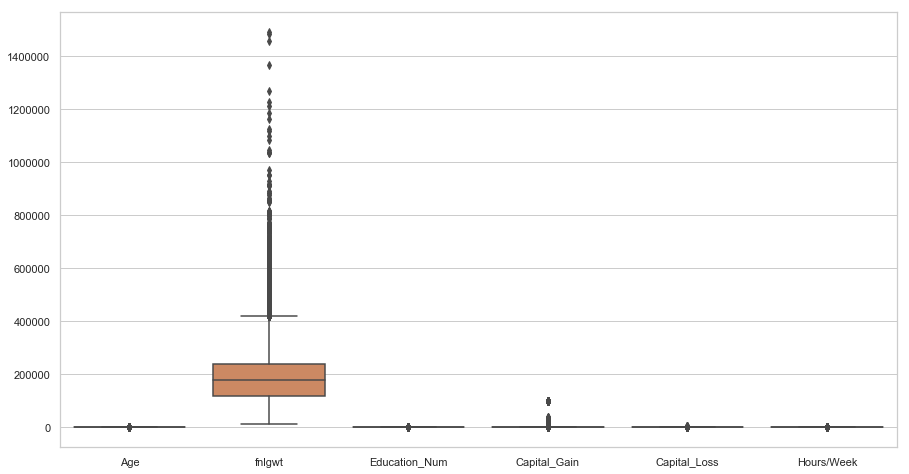

In [14]:
# looking for outliers using boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=numeric)

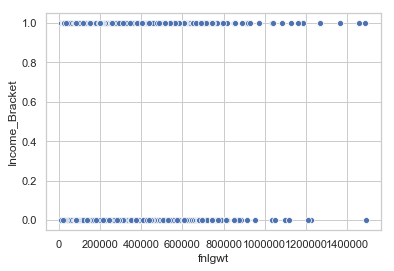

In [15]:
# fnlgwt vs Income_Bracket relationship
sns.scatterplot(x='fnlgwt', y='Income_Bracket', data=df)

Since fnlgwt seems to have a lot of outliers, and I don't know what its importance, I'll drop this column.
<br> fnlgwt supposed to be "final weight. In other words, this is the number of people the census believes the entry represents" 

In [16]:
# drop from data and numeric tables
df = df.drop('fnlgwt', axis=1)
numeric = numeric.drop('fnlgwt', axis=1)

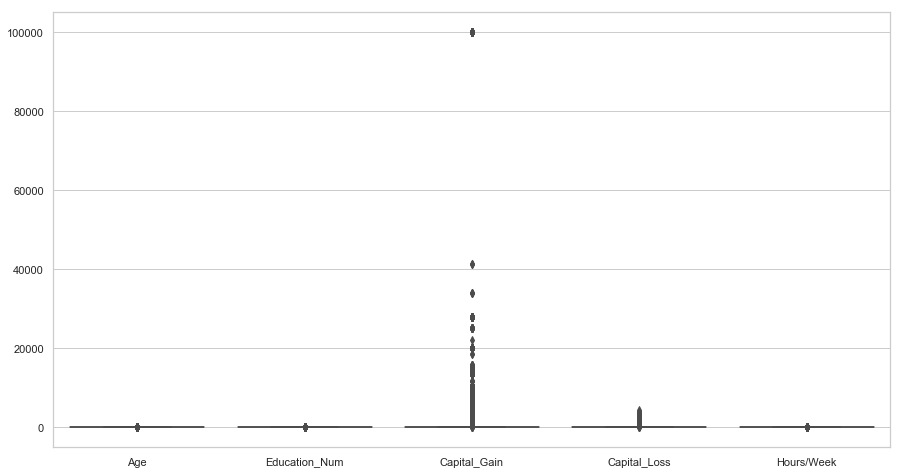

In [17]:
# looking for outliers using boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=numeric)

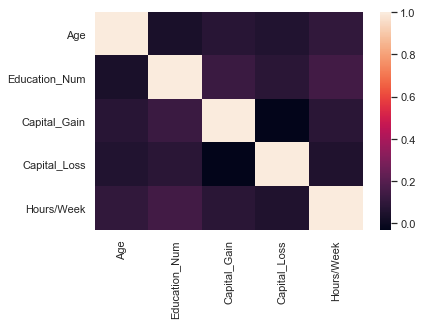

In [18]:
# check for correlation
correlation = numeric.corr()

# see in heatmap 
sns.heatmap(correlation)

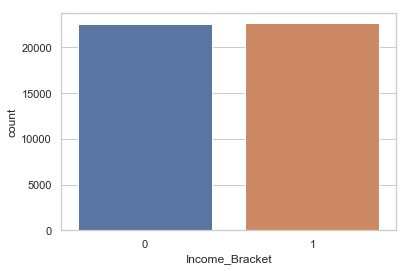

In [19]:
# check the amount of each outcome
sns.countplot(x=df['Income_Bracket'])

Text(0.5, 1.0, '# of years at each target group')

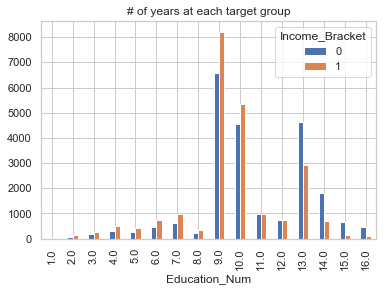

In [20]:
# compare between a few parameters 
pd.crosstab(df.Education_Num, df.Income_Bracket).plot(kind='bar')
plt.title('# of years at each target group')

It's interesting to see that people who studied more years (especially 13 and above) are more likely to earn less the $50k



### Models preparations

In [21]:
# make dependent and target
X = pd.concat([numeric, categorical], axis=1)
X = X.reset_index(drop=True)
y = df['Income_Bracket']

In [22]:
# make dummy variables
X = pd.get_dummies(X)

X.head()

,Age,Education_Num,Capital_Gain,Capital_Loss,Hours/Week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,...,Native_Country_ Portugal,Native_Country_ Puerto-Rico,Native_Country_ Scotland,Native_Country_ South,Native_Country_ Taiwan,Native_Country_ Thailand,Native_Country_ Trinadad&Tobago,Native_Country_ United-States,Native_Country_ Vietnam,Native_Country_ Yugoslavia
0,50,13.0,0.0,0.0,13.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,9.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,7.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,13.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,14.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
# Vanilla logistic regression
vanilla = LogisticRegression()
vanilla_cross_score = cross_val_score(vanilla, X, y, cv=10)
print("Vanilla score:\n", vanilla_cross_score)


# Ridge logistic regression
ridge = RidgeClassifier()
ridge_cross_score = cross_val_score(ridge, X_test, y_test, cv=10)
print("\nRidge score:\n", ridge_cross_score)

# Lasso logistic regression
lasso = LogisticRegression(penalty='l1', solver='liblinear')
lasso_cross_score = cross_val_score(lasso, X_test, y_test, cv=10)
print("\nLasso score:\n", lasso_cross_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Vanilla score:
 [0.77802344 0.79991156 0.79283661 0.64506855 0.56302521 0.57938965
 0.56899602 0.57563025 0.58018138 0.56514046]

Ridge score:
 [0.66126657 0.64653903 0.6440678  0.64627856 0.65364775 0.64233038
 0.63864307 0.64896755 0.62536873 0.65486726]

Lasso score:
 [0.65832106 0.65905744 0.64848931 0.65659543 0.6440678  0.64823009
 0.6460177  0.64380531 0.63716814 0.66887906]


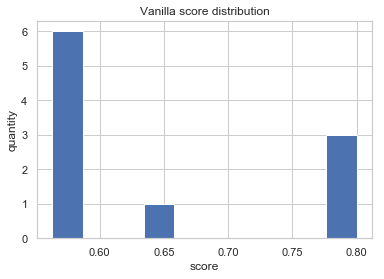

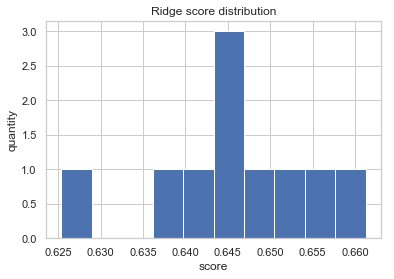

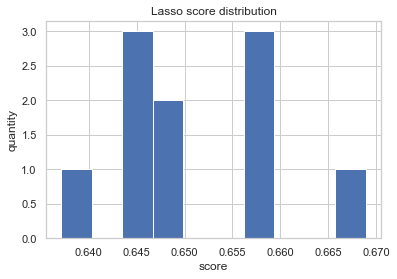

In [25]:
# plot the histogram of the scores

plt.hist(vanilla_cross_score, bins=10)
plt.title("Vanilla score distribution")
plt.xlabel("score")
plt.ylabel("quantity")
plt.show()

plt.hist(ridge_cross_score, bins=10)
plt.title("Ridge score distribution")
plt.xlabel("score")
plt.ylabel("quantity")
plt.show()

plt.hist(lasso_cross_score, bins=10)
plt.title("Lasso score distribution")
plt.xlabel("score")
plt.ylabel("quantity")
plt.show()

# Results
In general, all the logistic regressions didn't perform well. <br>
The vanilla regression performed the worst since its scores are very inconsistent.<br>
Ridge and Lasso perform very similarly and were more consistent. 